In [1]:
from feature_eng import *
from validation import *
from sandy_eng import *
import pandas as pd
import numpy as np

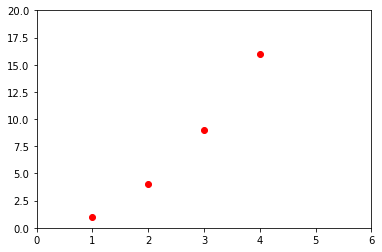

In [3]:
import matplotlib.pyplot as plt
from sklearn.externals import joblib
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
fig_obj=plt.gcf()
joblib.dump(fig_obj, 'testdump')
plt.show()

In [6]:
import datetime
dt_now=datetime.datetime.now()
str_now=dt_now.strftime('%b%d_%Hh%Mm')
str_now

'Apr21_17h58m'

In [2]:
import numpy as np

In [19]:
arr=np.array([1,1,1,1])
np.insert(arr,len(arr),1-arr)

array([1, 1, 1, 1, 0, 0, 0, 0])

In [21]:
np.stack((arr,0),axis=1)

ValueError: all input arrays must have the same shape

In [17]:
np.hstack((arr,1-arr)).shape

(8,)

#### Load Datasets

In [2]:
%%time
data=load_training_values() # Import
labels=load_training_labels()
test=load_test_values()
data=deleteColumns(data) # Remove Features
data=dataframe_tolower(data) # Lowercase
data=df_replace_emptystr(data) # Replace Empty Str
data=avgConstrYear(data) # Fill Zeros (Construction)
data=zeros_permit(data) # Fill Zeros (Permit)
data=zeros_means(data) # Fill Zeros (GPS)
data=convert_dates(data) # Convert Dates
data=fuzzy_string_match(data, 'installer', 79) # Fuzzy String Matching
data=fuzzy_string_match(data, 'funder', 79)
data=remove_low_frequencies(data, 20) # Lump Low Occuring

	 Dates have been converted: Descriptive Statistics:
count    5.940000e+04
mean    -7.514528e-14
std      1.000000e+00
min     -1.033577e+01
25%     -1.087269e+00
50%      5.823083e-01
75%      9.473413e-01
max      1.835987e+00
Name: date_recorded, dtype: float64
--create_merge_dict()--> creating nested dict of strings to merge

---> Number of items in the list to merge: 1934 

	 merge_replace(): 
	 ----->  	 Number of Strings Left: 1519
--create_merge_dict()--> creating nested dict of strings to merge

---> Number of items in the list to merge: 1897 

	 merge_replace(): 
	 ----->  	 Number of Strings Left: 1578
CPU times: user 49.9 s, sys: 84 ms, total: 50 s
Wall time: 49.9 s


In [3]:
data=strings_to_indicators(data)

Checking Null Dataframe...

	 No Nulls or Zeros
Converting the following features to dummies: 
 	
['funder',
 'installer',
 'wpt_name',
 'basin',
 'subvillage',
 'region',
 'lga',
 'ward',
 'scheme_management',
 'permit',
 'extraction_type',
 'management',
 'management_group',
 'payment',
 'water_quality',
 'quantity',
 'source',
 'source_class',
 'waterpoint_type']


In [19]:
# Print Out Descriptive Statistics of Data Frames
print('Matrix inputted into the moddel is {} rows (examples) and {} columns (features)'.format(data.shape[0], data.shape[1]))

Matrix inputted into the moddel is 59400 rows (examples) and 2065 columns (features)


In [4]:
data.to_pickle('data_preprocessed1')

### Test SVM

In [21]:
# already imported in sandy_eng

In [6]:
X=data.as_matrix()
y=label_binarize(labels['status_group'], classes=['functional','non functional','functional needs repair'])
n_classes=y.shape[1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

In [ ]:
classifier=OneVsRestClassifier(svm.LinearSVC(verbose=1, max_iter=1000000))
predicted=classifier.fit(X_train, y_train).predict(X_test)

[LibLinear]

In [ ]:
score=classifier.score(X_test, y_test)
acc=accuracy_score(y_test, predicted)

In [24]:
score

Object `classifier.score` not found.


In [ ]:
acc

In [105]:
df=data

In [107]:
columns = [i for i in df.columns if type(df[i].iloc[0]) == str]
df.loc[:, columns]=df.loc[:, columns].fillna('Other')
df.loc[:, columns]=df.loc[:, columns].replace(['','0',0,'-'], 'Other')

NameError: name 'df_no_nulls' is not defined

In [111]:
df_no_nulls(df.loc[:,columns])

Checking Null Dataframe...

	 No Nulls or Zeros


True

In [109]:
# New Df_no_nulls function
def df_no_nulls(df):
    nulls=df.isnull().sum(axis=0)
    zeros=(df==0).sum(axis=0)
    df_nulls=pd.concat([nulls, zeros], axis=1)
    df_nulls=df_nulls.loc[(df_nulls!=0).any(axis=1)]
    df_nulls.columns=['Null','Zeros']
    print('Checking Null Dataframe...\n')
    if df_nulls.empty:
        print('\t No Nulls or Zeros')
    else:
        print('\t There are Nulls or Zeros')
        print(df_nulls)

    return df_nulls.empty

#### Testing Dummy Variable Creation

In [13]:
d={'a':[1,2,3,4],'b':[3,3,3,4]}
ex=pd.DataFrame(d)
pd.get_dummies(ex.b)

,3,4
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0


In [112]:
train_values=data

In [ ]:
columns = [i for i in train_values.columns if type(train_values[i].iloc[0]) == str]
for column in columns:
		new_columns = [column+'_'+str(i) for i in train_values[column].unique()]
		train_values = pd.concat((train_values, pd.get_dummies(train_values[column], prefix = column)[new_columns]), axis = 1)
		del train_values[column]

In [ ]:
# First Delete Unwanted Columns And To Lower
# deleteColumns(train_values)
# train_values=replace_empty_str(train_values) # note: add other columns by passing in list
# dataframetolower(train_values)
# zeros_means(train_values) # Replace 0's in GPS, Long, Lat, Pop
# zeros_public_meeting(train_values) # Replace zeros in public_meeting with Neutral

In [13]:
%%time
# For installers
# first remove ints

from IPython.core.debugger import Tracer; Tracer()()
merge_installers = create_merge_dict(train_values, 'installer', 79) # TODO: fix create_merge_dict
#train2=merge_replace(train_values, merge_installers, "funder") # make sure didn't change original
merge_installers

> <timed exec>(5)<module>()

ipdb> c
--create_merge_dict()--> creating nested dict of strings to merge

---> Number of items in the list to merge: 2145 

CPU times: user 467 ms, sys: 7.09 ms, total: 474 ms
Wall time: 2.07 s


In [14]:
merge_installers

{'AC': {'ACT': 80},
 'ACTIVE TANK CO': {'ACTIVE TANK CO LTD': 88},
 'AD': {'ADB': 80, 'ADP': 80},
 'ADAP': {'ADP': 86},
 'ADRA /Government': {'ADRA/Government': 100},
 'AI': {'AIC': 80},
 'AIC': {'AICT': 86},
 'AMP Contract': {'AMP Contracts': 96, 'AMP contractor': 92},
 'AMP Contracts': {'AMP contractor': 89},
 'AQUA WEL': {'AQUA Wel': 100},
 'Action Contre La Faim': {'Action Contre la Faim': 100},
 'Active KMK': {'Active MKM': 90},
 'Adra /Community': {'Adra/ Community': 100, 'Adra/Community': 100},
 'Adra/ Community': {'Adra/Community': 100},
 'Africa': {'Africa M': 86, 'Africaone': 80, 'Africare': 86},
 'Africa Muslim Agenc': {'African Muslims Age': 89},
 'Africaone': {'Africaone Ltd': 82, 'Africare': 82},
 'Ahmad': {'Amadi': 80},
 'Amadi': {'Amari': 80},
 'Amboni Plantation': {'Amboni plantation': 100},
 'Anglica Church': {'Anglican Church': 97, 'Anglican church': 97},
 'Anglican': {'Anglikan': 88, 'Anglikana': 82},
 'Anglican Church': {'Anglican church': 100},
 'Anglikan': {'Angl

In [10]:
merge_installers=[i.lower() for i in merge_installers]

#### Random

In [59]:
%%time
#Example: Testing on GPS data
from sklearn import preprocessing, svm

gps_data=train_values.filter(['longitude','latitude','gps_height'],axis=1)
le = preprocessing.LabelEncoder()
le.fit(target)
y=le.transform(target)

classifier=svm.SVC()
classifier.fit(gps_data, y)
score=classifier.score(gps_data, y)

CPU times: user 3min 34s, sys: 6.92 s, total: 3min 41s
Wall time: 3min 41s


In [62]:
data=train_values

In [32]:
?pd.DataFrame.replace()

In [35]:
replaced=train_values["funder"].replace(['NaN','','0'], ['NULL','NULL','NULL'])

In [43]:
?pd.DataFrame.set_value()

In [83]:
data.funder.replace(['0',0],'Other', inplace=True)
#data.funder.replace(0, 'Other')
data.funder.fillna('Other', inplace=True)

In [84]:
data.iloc[59387]['funder']

'Other'

In [73]:
[i for i in data.funder if type(i)==float]

[nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan

In [55]:
# To Get Unique Values of a List
fundertypes=[type(i) for i in train_values.funder]
print(set(fundertypes))

{<class 'str'>, <class 'float'>}


In [47]:
train_values[train_values.funder.isnull()]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
34,41583,0.0,2011-02-23,NaN,-41,NaN,39.812912,-7.889986,Msikitini Wa Ijumaa,0,...,never pay,salty,salty,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
43,19282,0.0,2013-01-15,NaN,1642,NaN,34.967789,-4.628921,Mvae Primary,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
47,13620,0.0,2011-07-27,NaN,0,NaN,33.540607,-9.172905,Mahakamani,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
65,51072,0.0,2013-02-09,NaN,1415,NaN,34.621598,-5.173136,Nyambi,0,...,unknown,unknown,unknown,dry,dry,machine dbh,borehole,groundwater,communal standpipe,communal standpipe
71,17386,0.0,2011-03-31,NaN,0,NaN,34.462228,-8.575780,Kwa Manyusi Mlilo,0,...,never pay,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe
72,41609,0.0,2011-04-04,NaN,0,NaN,34.247180,-8.607513,Kwa Mzee Mwalongo,0,...,never pay,soft,good,seasonal,seasonal,river,river/lake,surface,communal standpipe,communal standpipe
75,62971,0.0,2011-08-07,NaN,0,NaN,31.796873,-1.351486,Kwa Jackson,0,...,never pay,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
109,7116,0.0,2011-07-12,NaN,0,NaN,33.805081,-9.130674,Kwa Mzee Kaiga,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
124,14016,0.0,2011-04-07,NaN,0,NaN,33.873104,-9.290616,Busekele,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
126,73061,50.0,2013-02-14,NaN,1455,NaN,34.710643,-5.186766,Aley Mak8Ta,0,...,per bucket,soft,good,insufficient,insufficient,machine dbh,borehole,groundwater,communal standpipe,communal standpipe


In [40]:
train_values[train_values["funder"]=="Roman"]

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
80,19415,0.0,2011-03-02,Roman,2328,Commu,34.284476,-9.271565,none,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
81,65531,0.0,2011-03-04,Roman,427,Roman,37.722953,-7.024263,Kwa Mzee Zewe,0,...,never pay,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
329,13195,0.0,2011-04-06,Roman,0,Roman,36.045840,-5.929901,Shuleni,0,...,per bucket,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
927,28993,3000.0,2011-03-07,Roman,1445,DWE,34.666082,-10.117379,none,0,...,monthly,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
1125,48621,3000.0,2011-03-16,Roman,1141,wanan,35.085516,-9.878845,none,0,...,monthly,soft,good,dry,dry,spring,spring,groundwater,communal standpipe,communal standpipe
1210,20028,6000.0,2011-03-14,Roman,1335,Roman,34.954032,-9.867335,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1981,23342,0.0,2011-03-03,Roman,2338,Commu,34.260534,-9.286159,none,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2185,25797,0.0,2011-03-17,Roman,2075,MLADE,34.678605,-9.681406,none,0,...,on failure,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
2455,48373,0.0,2011-03-04,Roman,2276,Commu,34.334343,-9.316806,none,0,...,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [29]:
funders=train_values["funder"]

In [16]:
le.fit(funders)
y_funders=le.transform(funders)

TypeError: unorderable types: str() > float()